In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from coffea.hist import plot
import coffea.hist as hist

In [2]:
msd = 'leadAK8JetMass'
Hbb = 'leadAK8JetHbb'
dataset_axis = hist.Cat("dataset", "Primary dataset")
msd_axis = hist.Bin(msd, r"lead. FatJet $m_{SD}$ [GeV]", 200, 0, 1000)

#input_file = "/work/mmarcheg/DNN/Evaluation/BDT_ttHTobb_ttTo2L2Nu_scan/inclusive/DNNTraining_v04_25442_eval.calibrated.h5"
input_file = "/work/mmarcheg/DNN/Evaluation/BDT_ttHTobb_ttTo2L2Nu_noAK8Mass/inclusive/DNNTraining_v04_25442_eval.calibrated.h5"
df = pd.read_hdf(input_file)
label = [column for column in df.columns if 'label' in column][0]
scores = [column for column in df.columns if 't20' in column]
df    

,njets,ngoodjets,btags,nfatjets,met_pt,met_phi,leading_jet_pt,leading_jet_eta,leading_jet_phi,leading_jet_mass,...,max8eta01_wp,max8eta01_auc,max8eta03_t20,max8eta03_rounded_score,max8eta03_wp,max8eta03_auc,max8eta05_t20,max8eta05_rounded_score,max8eta05_wp,max8eta05_auc
entry,,,,,,,,,,,,,,,,,,,,,
185721,3.0,7.0,1.0,1.0,117.011032,2.296875,44.84375,-0.609619,0.656006,8.531250,...,0.323976,0.869559,0.278322,0,0.287539,0.872872,0.299307,0,0.308322,0.869722
58845,0.0,5.0,4.0,1.0,98.168236,1.183838,0.00000,0.000000,0.000000,0.000000,...,0.323976,0.869559,0.929788,0,0.287539,0.872872,0.963972,0,0.308322,0.869722
193189,0.0,5.0,2.0,1.0,141.971268,-2.291504,0.00000,0.000000,0.000000,0.000000,...,0.323976,0.869559,0.332417,0,0.287539,0.872872,0.298793,0,0.308322,0.869722
119929,0.0,2.0,1.0,1.0,116.390724,-1.137451,0.00000,0.000000,0.000000,0.000000,...,0.323976,0.869559,0.032743,0,0.287539,0.872872,0.024572,0,0.308322,0.869722
123087,1.0,5.0,2.0,2.0,105.757698,2.013184,373.00000,0.684570,0.999634,21.343750,...,0.323976,0.869559,0.358603,1,0.287539,0.872872,0.278286,1,0.308322,0.869722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25275,1.0,4.0,1.0,1.0,76.565025,0.696777,120.37500,0.866943,-0.878784,11.617188,...,0.323976,0.869559,0.876463,1,0.287539,0.872872,0.900764,1,0.308322,0.869722
7658,2.0,5.0,2.0,1.0,91.376236,-1.928467,158.87500,0.385437,2.203125,10.335938,...,0.323976,0.869559,0.188074,0,0.287539,0.872872,0.188329,1,0.308322,0.869722
12771,2.0,5.0,1.0,1.0,74.727158,-1.745117,104.06250,-1.110352,-1.909180,23.562500,...,0.323976,0.869559,0.842235,1,0.287539,0.872872,0.904374,1,0.308322,0.869722


/work/mmarcheg/miniconda3/envs/coffea7/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


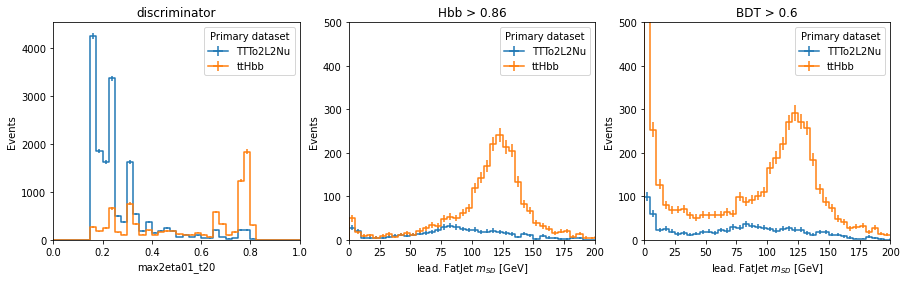

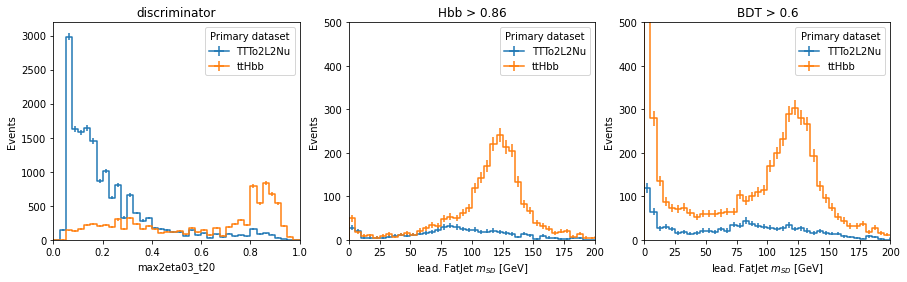

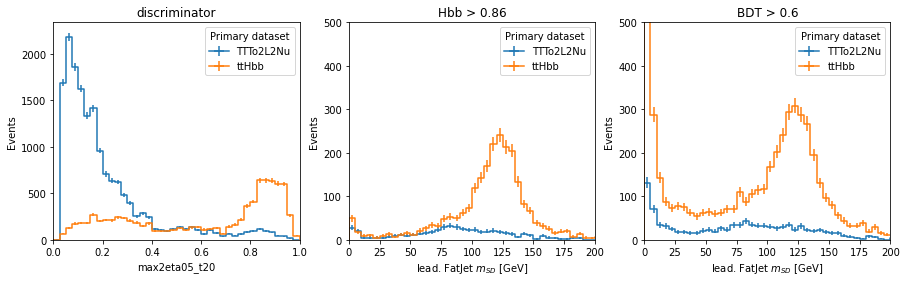

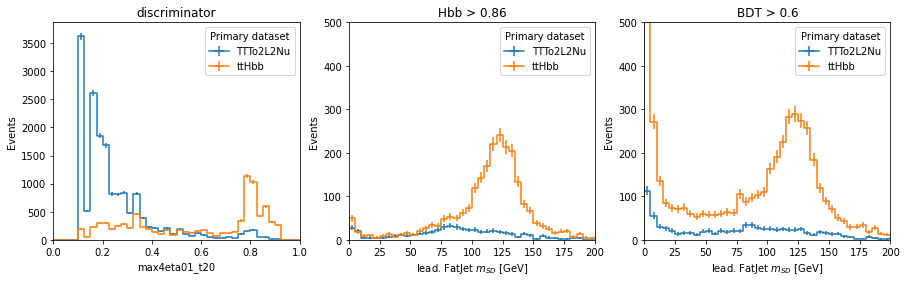

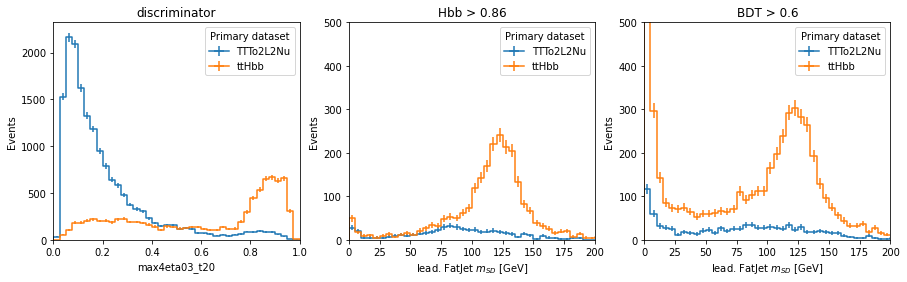

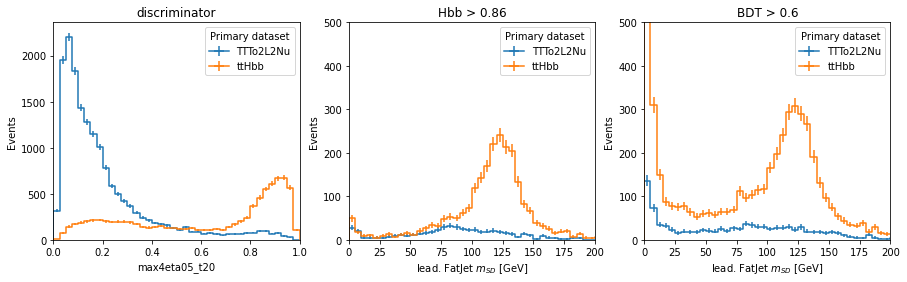

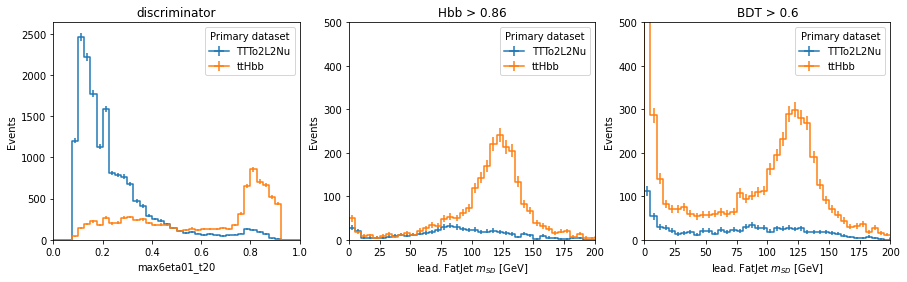

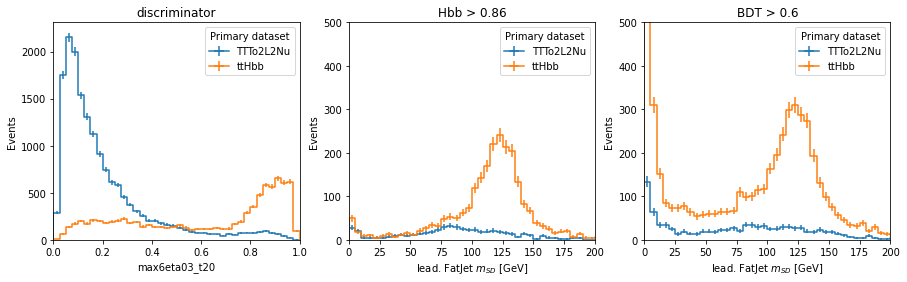

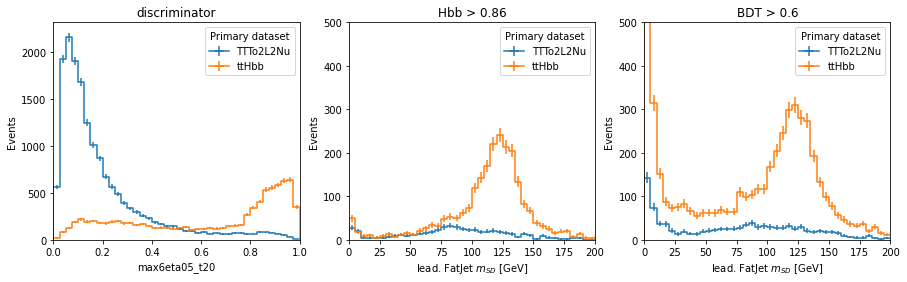

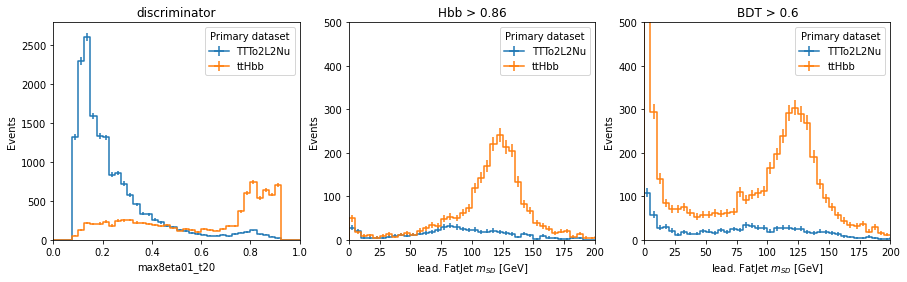

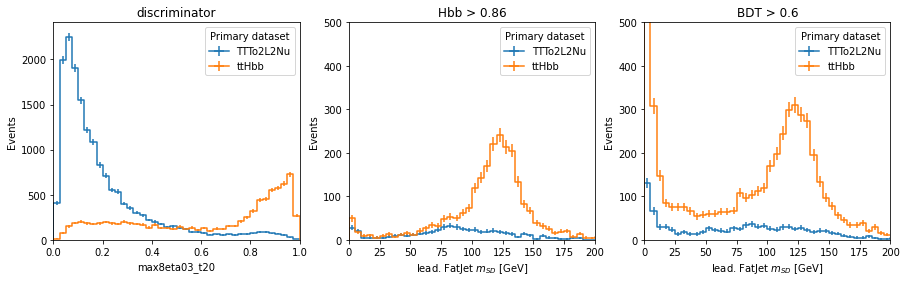

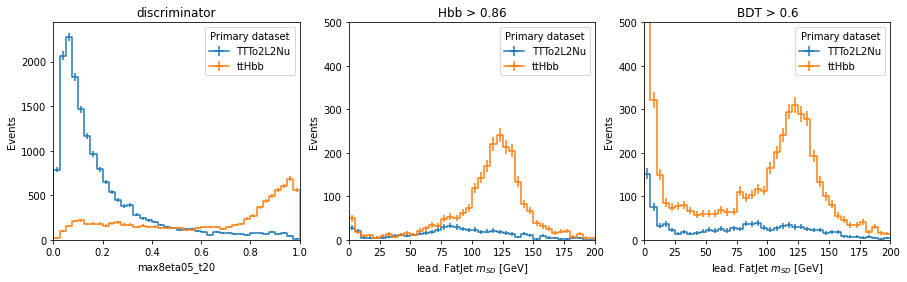

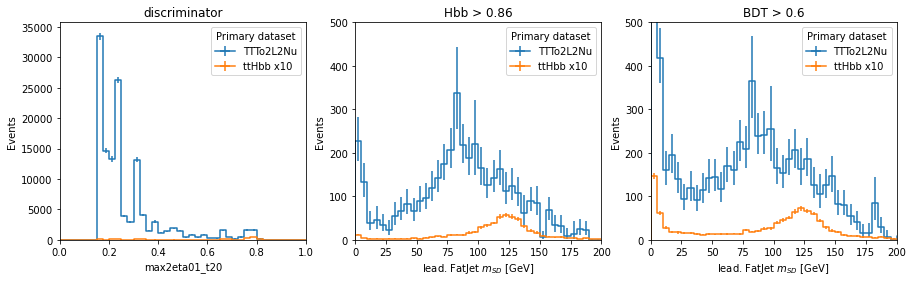

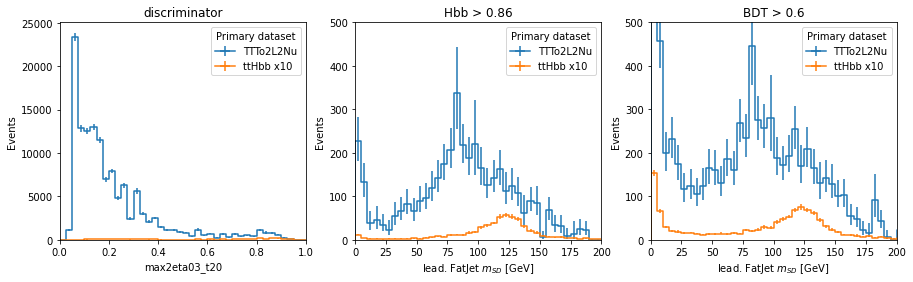

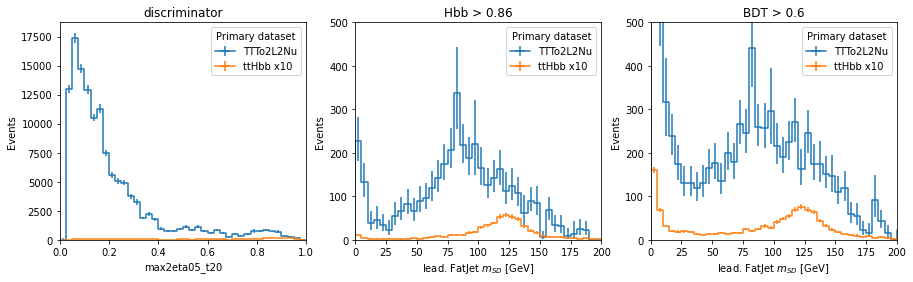

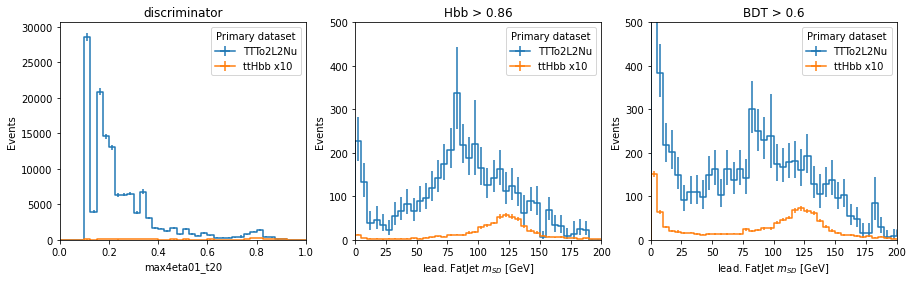

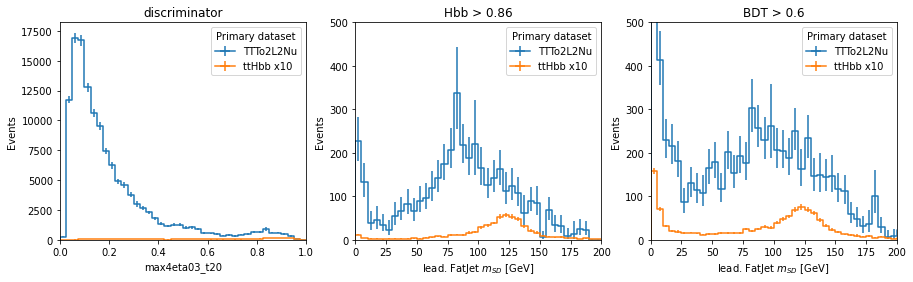

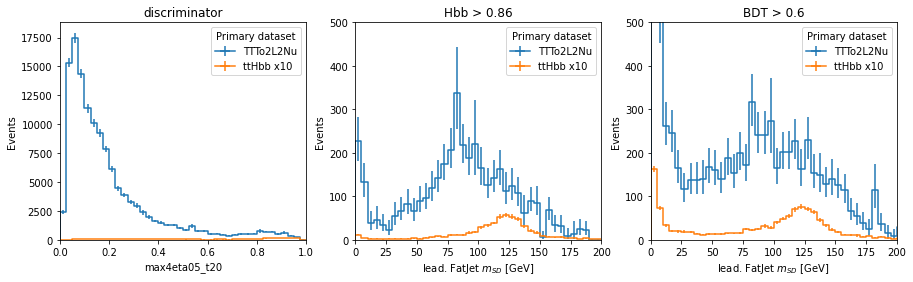

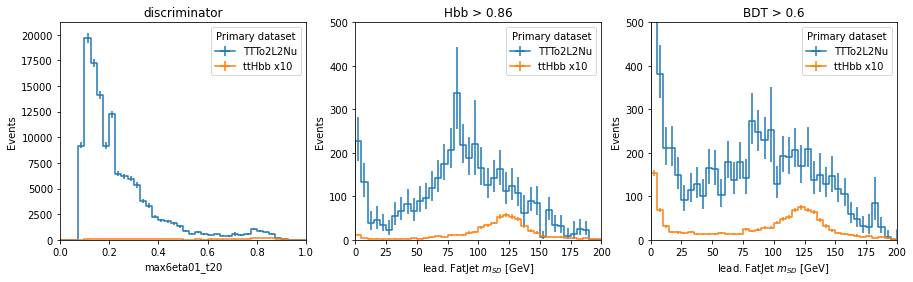

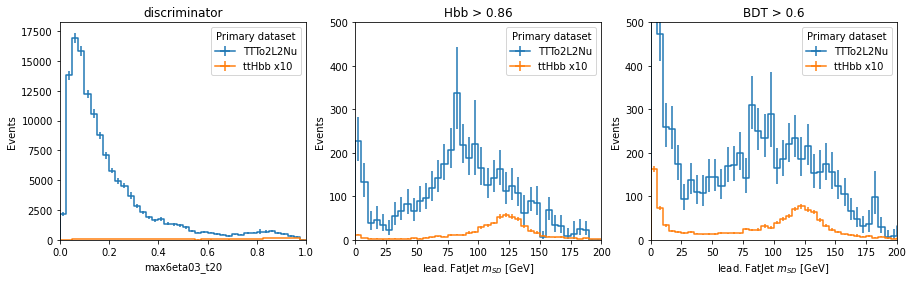

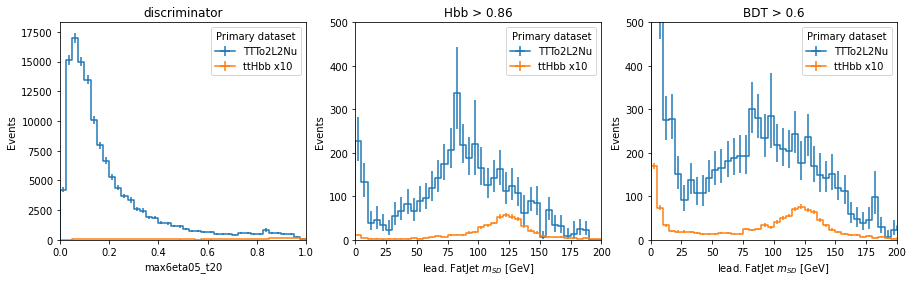

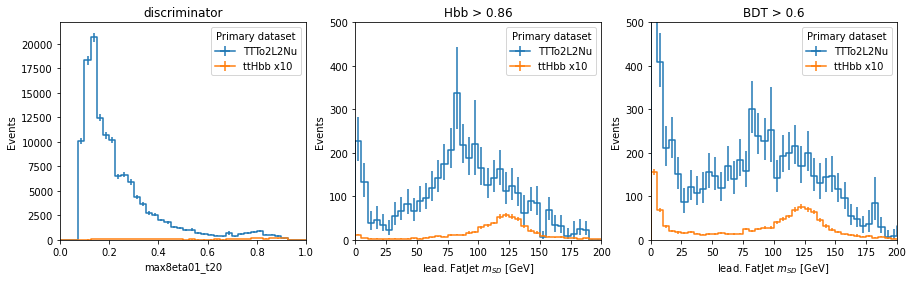

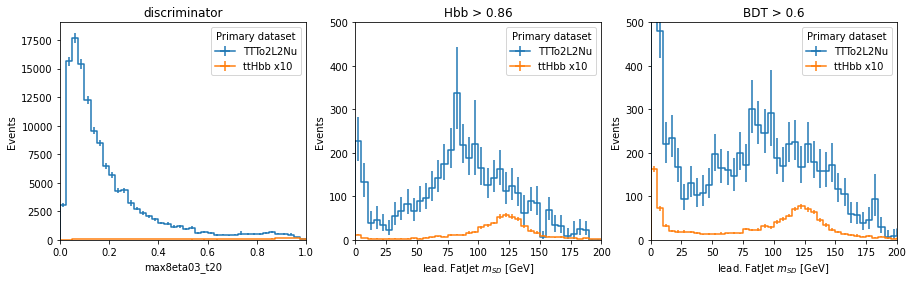

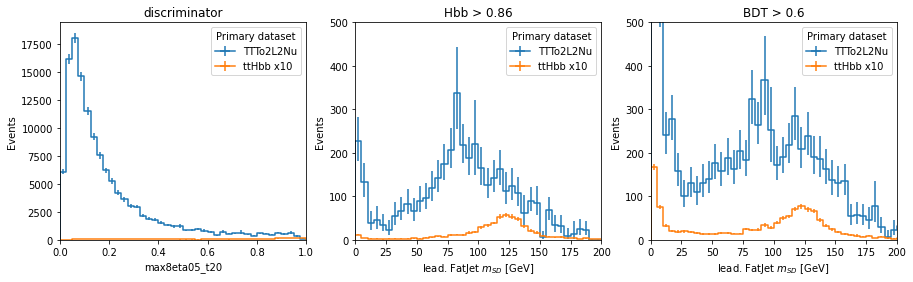

In [3]:
for norm in [False, True]:
    for score in scores:
        tagger_axis    = hist.Bin(score, score, 40, 0, 1)
        tagger_hist    = hist.Hist("Events", dataset_axis, tagger_axis)
        msd_hist_boost = hist.Hist("Events", dataset_axis, msd_axis)
        msd_hist       = hist.Hist("Events", dataset_axis, msd_axis)
        sig = df.query(label + ' > 0.5')
        bkg = df.query(label + ' < 0.5')
        #wp = df[score.rstrip('_t20') + '_wp'].values[0]
        wp = 0.6
        wp_Hbb = 0.86
        sig_boost  = sig.query(Hbb + ' > ' + str(wp_Hbb))
        bkg_boost  = bkg.query(Hbb + ' > ' + str(wp_Hbb))
        sig_in_cut = sig.query(score + ' > ' + str(wp))
        bkg_in_cut = bkg.query(score + ' > ' + str(wp))
        #sig_in_cut = sig_in_cut.query(Hbb + ' > ' + str(wp_Hbb))
        #bkg_in_cut = bkg_in_cut.query(Hbb + ' > ' + str(wp_Hbb))

        fields_sig = {score : sig[score].values}
        fields_bkg = {score : bkg[score].values}
        fields_sig_boost = {msd : sig_boost[msd].values}
        fields_bkg_boost = {msd : bkg_boost[msd].values}
        fields_sig_in_cut = {msd : sig_in_cut[msd].values}
        fields_bkg_in_cut = {msd : bkg_in_cut[msd].values}

        
        if norm:
            A = 10
            tagger_hist.fill(dataset='ttHbb x'+str(A), **fields_sig, weight=A*sig['weights_nominal'].values)
            tagger_hist.fill(dataset='TTTo2L2Nu', **fields_bkg, weight=bkg['weights_nominal'].values)    
            msd_hist_boost.fill(dataset='ttHbb x'+str(A), **fields_sig_boost, weight=A*sig_boost['weights_nominal'].values)
            msd_hist_boost.fill(dataset='TTTo2L2Nu', **fields_bkg_boost, weight=bkg_boost['weights_nominal'].values)
            msd_hist.fill(dataset='ttHbb x'+str(A), **fields_sig_in_cut, weight=A*sig_in_cut['weights_nominal'].values)
            msd_hist.fill(dataset='TTTo2L2Nu', **fields_bkg_in_cut, weight=bkg_in_cut['weights_nominal'].values)
        else:
            tagger_hist.fill(dataset='ttHbb', **fields_sig)
            tagger_hist.fill(dataset='TTTo2L2Nu', **fields_bkg)
            msd_hist_boost.fill(dataset='ttHbb', **fields_sig_boost)
            msd_hist_boost.fill(dataset='TTTo2L2Nu', **fields_bkg_boost)
            msd_hist.fill(dataset='ttHbb', **fields_sig_in_cut)
            msd_hist.fill(dataset='TTTo2L2Nu', **fields_bkg_in_cut)
            
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
        plot.plot1d(tagger_hist, ax=ax1, legend_opts={'loc':1})
        ax1.set_title('discriminator')
        plot.plot1d(msd_hist_boost, ax=ax2, legend_opts={'loc':1})
        ax2.set_title('Hbb > ' + str(wp_Hbb))
        ax2.set_xlim(0,200)
        ax2.set_ylim(0,500)
        plot.plot1d(msd_hist, ax=ax3, legend_opts={'loc':1})
        ax3.set_title('BDT > ' + str(wp))
        #ax3.set_title('Hbb > ' + str(wp_Hbb) + ' & BDT > ' + str(wp))
        ax3.set_xlim(0,200)
        ax3.set_ylim(0,500)
        #if norm:
        #    for ax in [ax1, ax2, ax3]:
        #        ax.set_ylim(0.01, 1000)
        #        ax.set_yscale('log')

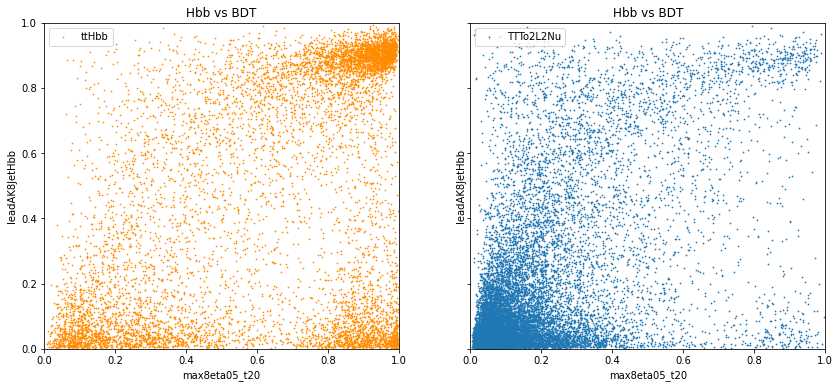

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig[score].values, sig[Hbb].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg[score].values, bkg[Hbb].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(score)
    ax.set_ylabel(Hbb)
    ax.set_title("Hbb vs BDT")
    ax.legend(loc="upper left")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

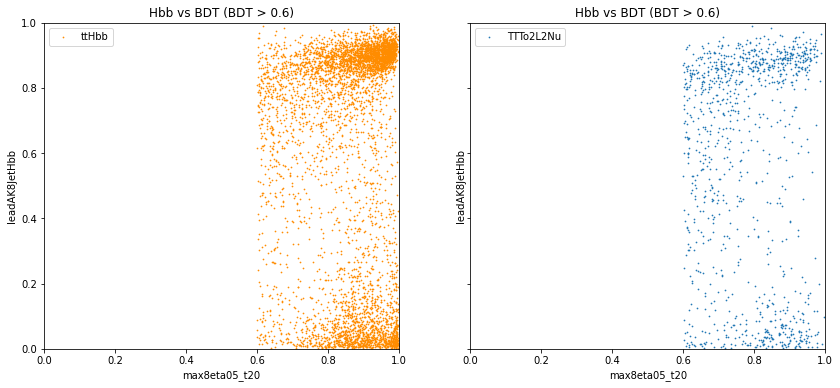

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig_in_cut[score].values, sig_in_cut[Hbb].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg_in_cut[score].values, bkg_in_cut[Hbb].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(score)
    ax.set_ylabel(Hbb)
    ax.set_title("Hbb vs BDT (BDT > " + str(wp) + ")")
    ax.legend(loc="upper left")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

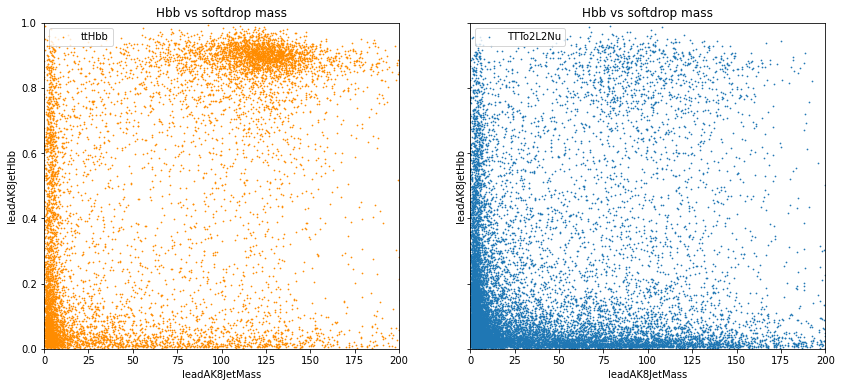

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig[msd].values, sig[Hbb].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg[msd].values, bkg[Hbb].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(msd)
    ax.set_ylabel(Hbb)
    ax.set_title("Hbb vs softdrop mass")
    ax.legend(loc="upper left")
    ax.set_xlim(0,200)
    ax.set_ylim(0,1)

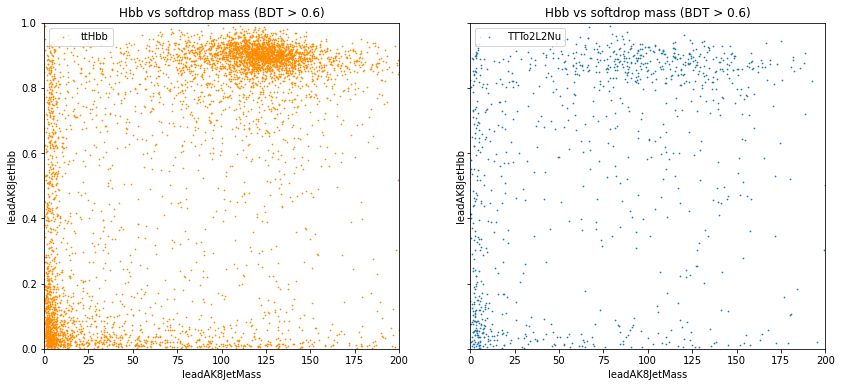

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig_in_cut[msd].values, sig_in_cut[Hbb].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg_in_cut[msd].values, bkg_in_cut[Hbb].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(msd)
    ax.set_ylabel(Hbb)
    ax.set_title("Hbb vs softdrop mass (BDT > " + str(wp) + ")")
    ax.legend(loc="upper left")
    ax.set_xlim(0,200)
    ax.set_ylim(0,1)

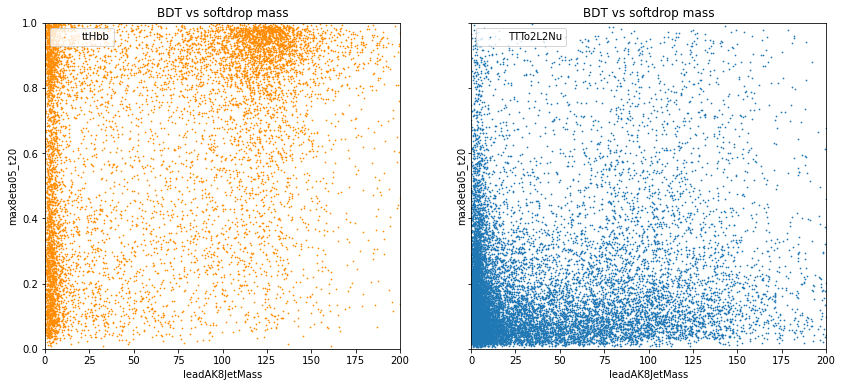

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig[msd].values, sig[score].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg[msd].values, bkg[score].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(msd)
    ax.set_ylabel(score)
    ax.set_title("BDT vs softdrop mass")
    ax.legend(loc="upper left")
    ax.set_xlim(0,200)
    ax.set_ylim(0,1)

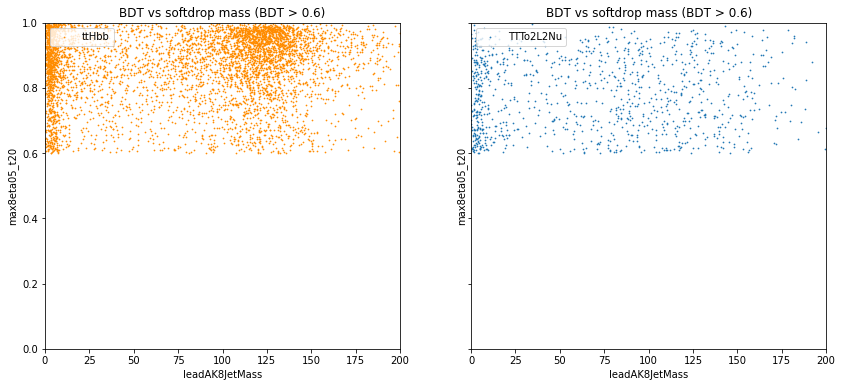

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
ax1.scatter(sig_in_cut[msd].values, sig_in_cut[score].values, s=0.5, label='ttHbb', color='darkorange')
ax2.scatter(bkg_in_cut[msd].values, bkg_in_cut[score].values, s=0.5, label='TTTo2L2Nu')
for ax in [ax1, ax2]:
    ax.set_xlabel(msd)
    ax.set_ylabel(score)
    ax.set_title("BDT vs softdrop mass (BDT > " + str(wp) + ")")
    ax.legend(loc="upper left")
    ax.set_xlim(0,200)
    ax.set_ylim(0,1)

In [10]:
df[[score, 'leadAK8JetMass']].corr()

,max8eta05_t20,leadAK8JetMass
max8eta05_t20,1.000000,0.355909
leadAK8JetMass,0.355909,1.000000
